In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


In [2]:
#Importing all the required packages
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier



2024-04-15 06:51:18.480091: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 06:51:18.480266: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 06:51:18.659504: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Part 1: Data Exploration and Preprocessing
****
Data Understanding: Load the dataset and perform an initial exploration to understand its structure, identify missing values, and gather basic statistics.
Preprocessing: Clean the dataset by handling missing values, outliers, and any erroneous data

In [3]:
#getting data into a dataframe
df= pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')

In [4]:
#overview of data spread from top 5 rows
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
#Data Level attributes understanding, finding null and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
#data distribution status report
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [7]:
#Checking Outliers
cols2=['Customer_Age',
'Dependent_count',
'Months_on_book',
'Total_Relationship_Count', 
'Months_Inactive_12_mon',
'Contacts_Count_12_mon', 
'Credit_Limit', 
'Total_Revolving_Bal',
'Avg_Open_To_Buy', 
'Total_Amt_Chng_Q4_Q1', 
'Total_Trans_Amt',
'Total_Trans_Ct', 
'Total_Ct_Chng_Q4_Q1', 
'Avg_Utilization_Ratio',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]

out=[]
for i in cols2: 
    min, max=df[i].mean() - df[i].std()*3, df[i].mean() + df[i].std()*3
    x=(df[i] > min) & (df[i] < max)
    if len(x.value_counts())>1:
        out.append(i)
        print(i, x.value_counts()[1])


Customer_Age 1
Months_Inactive_12_mon 124
Contacts_Count_12_mon 54
Total_Amt_Chng_Q4_Q1 163
Total_Trans_Amt 391
Total_Trans_Ct 2
Total_Ct_Chng_Q4_Q1 113


/tmp/ipykernel_33/2045809553.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(i, x.value_counts()[1])


In [8]:
#Removing Outliers
for i in cols2: 
    min, max=df[i].mean() - df[i].std()*3, df[i].mean() + df[i].std()*3
    df=df[(df[i] > min) & (df[i] < max)]

In [9]:
#Mandatory columns to be taken as a feature for predicting the attrition by removing non-required columns

f_cols=['Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

**Part 2: Data Analysis and Visualization**

Customer Demographics Analysis: Analyze the demographics of the credit card holders (e.g., age, salary, marital status) and visualize the distributions.
Credit Usage Analysis: Explore how different demographics correlate with credit card limit, balance, and category. Identify any interesting patterns.


In [10]:
#Converting target variable from object type to integer
label_encoder = LabelEncoder()
df['Attrition_Flag']=label_encoder.fit_transform(df['Attrition_Flag'])


In [11]:
#Understanding of object type columns and data distribution among different particulars
cls=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for i in cls:
    print(df[i].value_counts())

Gender
F    5015
M    4302
Name: count, dtype: int64
Education_Level
Graduate         2890
High School      1837
Unknown          1391
Uneducated       1365
College           945
Post-Graduate     473
Doctorate         416
Name: count, dtype: int64
Marital_Status
Married     4252
Single      3688
Unknown      692
Divorced     685
Name: count, dtype: int64
Income_Category
Less than $40K    3323
$40K - $60K       1653
$80K - $120K      1396
$60K - $80K       1251
Unknown           1027
$120K +            667
Name: count, dtype: int64
Card_Category
Blue        8730
Silver       476
Gold          94
Platinum      17
Name: count, dtype: int64


<Axes: >

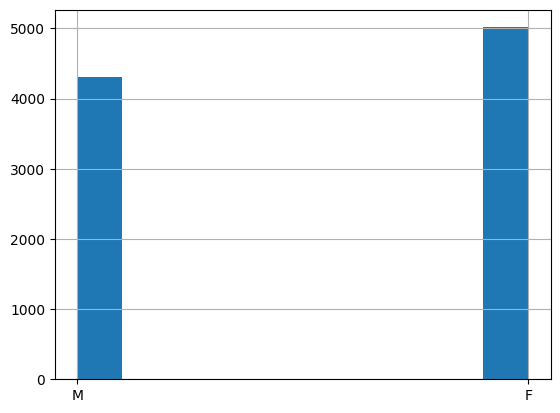

In [12]:
#Understanding gender data distribution (Figure 1)
df['Gender'].hist() 

<Axes: >

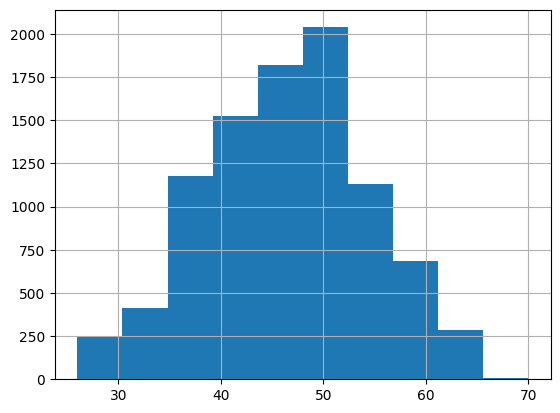

In [13]:
#Data distribution around age among customer (Figure 2)
df['Customer_Age'].hist()

<Axes: >

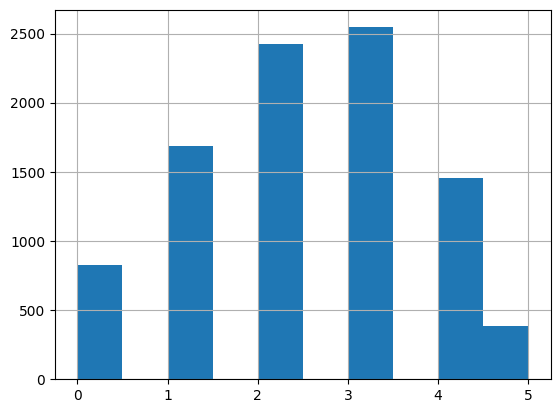

In [14]:
#Dependent count among customers (Figure 3)
df['Dependent_count'].hist()

<Axes: >

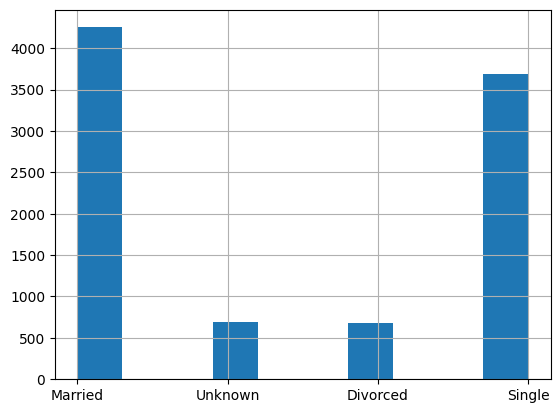

In [15]:
#How marital status distributed (Figure 4)
df['Marital_Status'].hist()

<Axes: xlabel='Customer_Age'>

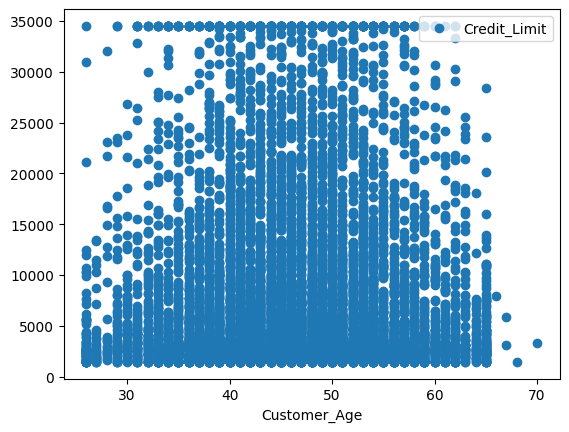

In [16]:
#How Customer age and credit limit is distributed (Figure 5)
df[['Customer_Age', 'Credit_Limit' ]].plot(x='Customer_Age', y='Credit_Limit', style='o')

<Axes: xlabel='Total_Revolving_Bal'>

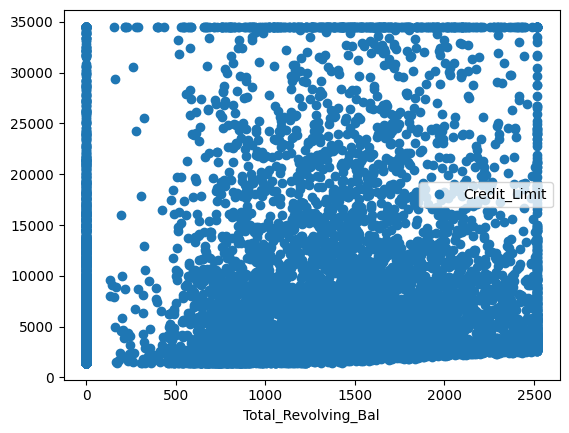

In [17]:
#DIstribution of data about their revolving balance and how they are their credit limit is distributed (Figure 6)
df[['Total_Revolving_Bal', 'Credit_Limit' ]].plot(x='Total_Revolving_Bal', y='Credit_Limit', style='o')

<Axes: xlabel='Income_Category'>

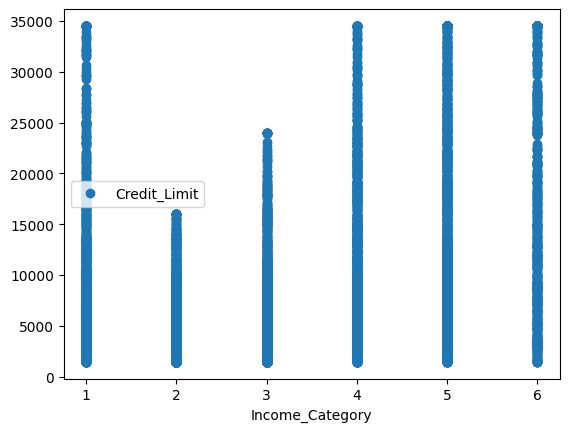

In [18]:
#Income and Credit limit distribution and how that data is used as a metrics to set credit limit (Figure 7)
Inc_cat=list(set(df['Income_Category']))
new_cat={'Unknown':1,
 '$40K - $60K':3,
 'Less than $40K':2,
 '$60K - $80K':4,
 '$80K - $120K':5,
 '$120K +':6}
df2=df.copy()
df2['Income_Category']=df2['Income_Category'].map(new_cat)


df2[['Income_Category', 'Credit_Limit' ]].plot(x='Income_Category', y='Credit_Limit', style='o')

Income Category has been updated with class digit to understand the data spread

'Unknown':1,
 '$40K - $60K':3,
 'Less than $40K':2,
 '$60K - $80K':4,
 '$80K - $120K':5,
 '$120K +':6

**Part 3: Customer Segmentation**

Segmentation Model: Use clustering techniques (e.g., K-Means) to segment the customers based on their credit card usage and demographic data. Determine the optimal number of clusters.
Segment Analysis: Analyze each customer segment to identify unique behaviors and characteristics. Provide actionable insights for targeted marketing strategies.


<Axes: xlabel='Customer_Age'>

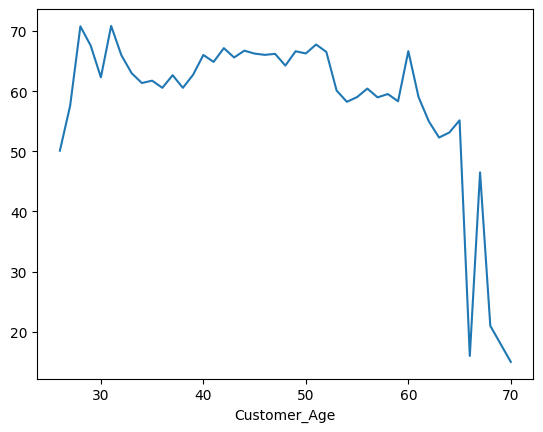

In [19]:
#Customer Age and Transaction count distribution, how frequent customer is for transaction based on age (Figure 8)
Age_TxnCt=df.groupby('Customer_Age')['Total_Trans_Ct'].mean()
Age_TxnCt.plot()

<Axes: xlabel='Customer_Age'>

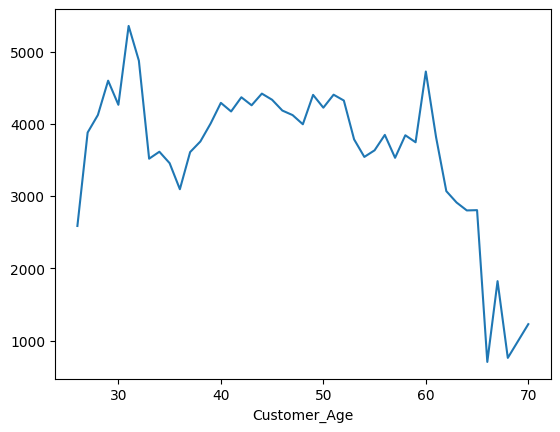

In [20]:
#What kind of amount customer is using based on the age, to get max and min amount usage group (Figure 9)
Age_TxnAmt=df.groupby('Customer_Age')['Total_Trans_Amt'].mean()
Age_TxnAmt.plot()

In [21]:
# Separate data based on Attrition status (Figure 10)
Existing = df[df['Attrition_Flag'] == 1]
Attrition = df[df['Attrition_Flag'] == 0] #default

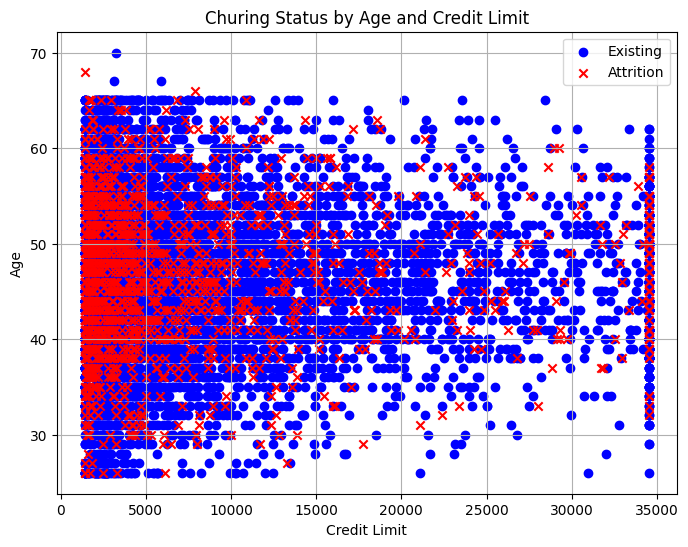

In [22]:
#Churing Status by Age and Credit Limit (Figure 11)
plt.figure(figsize=(8, 6))
plt.scatter(Existing['Credit_Limit'], Existing['Customer_Age'], label='Existing', color='blue', marker='o')
plt.scatter(Attrition['Credit_Limit'], Attrition['Customer_Age'], label='Attrition', color='red', marker='x')
plt.xlabel('Credit Limit')
plt.ylabel('Age')
plt.title('Churing Status by Age and Credit Limit')
plt.legend()
plt.grid(True)
plt.show()

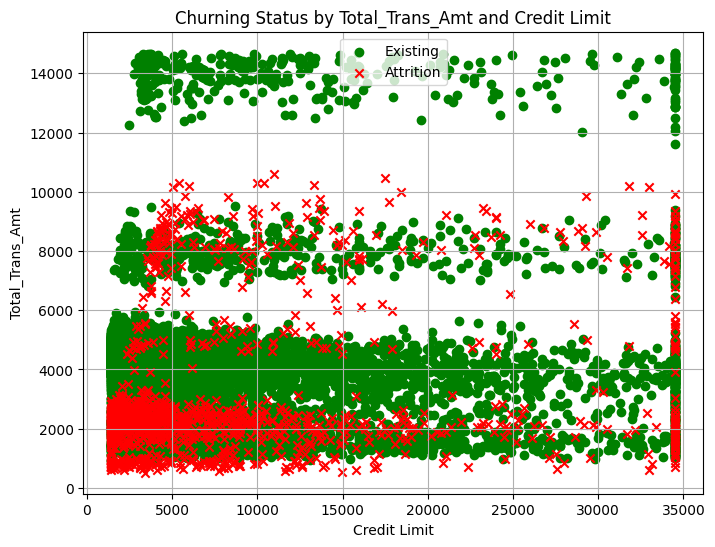

In [23]:
#Churning Status by Total_Trans_Amt and Credit Limit (Figure 12)
plt.figure(figsize=(8, 6))
plt.scatter(Existing['Credit_Limit'], Existing['Total_Trans_Amt'], label='Existing', color='green', marker='o')
plt.scatter(Attrition['Credit_Limit'], Attrition['Total_Trans_Amt'], label='Attrition', color='red', marker='x')
plt.xlabel('Credit Limit')
plt.ylabel('Total_Trans_Amt')
plt.title('Churning Status by Total_Trans_Amt and Credit Limit')
plt.legend()
plt.grid(True)
plt.show()


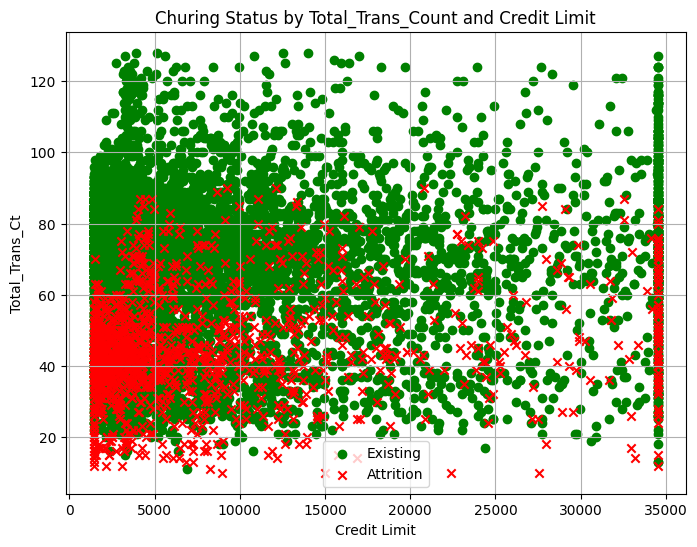

In [24]:
#Churing Status by Total_Trans_Count and Credit Limit (Figure 13)
plt.figure(figsize=(8, 6))
plt.scatter(Existing['Credit_Limit'], Existing['Total_Trans_Ct'], label='Existing', color='green', marker='o')
plt.scatter(Attrition['Credit_Limit'], Attrition['Total_Trans_Ct'], label='Attrition', color='red', marker='x')
plt.xlabel('Credit Limit')
plt.ylabel('Total_Trans_Ct')
plt.title('Churing Status by Total_Trans_Count and Credit Limit')
plt.legend()
plt.grid(True)
plt.show()

**Part 4: Predictive Modeling**

Churn Prediction: Build a predictive model to forecast customer churn based on the features available in the dataset. Experiment with at least two different algorithms and compare their performance.
Model Evaluation: Assess the models using appropriate performance metrics. Discuss the strengths and weaknesses of each model.


In [25]:
# Separate target from predictors
y = df.Attrition_Flag
X = df.drop(['Attrition_Flag'], axis=1)


X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)


In [26]:
# set up the encoder
encoder = TargetEncoder(cols=cls)

# fit the encoder - finds the mean target value per category
encoder.fit(X_train, y_train)

# transform data
X_train_enc = encoder.transform(X_train)
X_valid_enc = encoder.transform(X_valid)



In [27]:
X_train_enc.columns



#       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
#       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [28]:
#Model 1 development and prediction - Random Forest Classifier
model1 = RandomForestClassifier(n_estimators=100, random_state=0)
model1.fit(X_train_enc[f_cols], y_train)
preds1 = model1.predict(X_valid_enc[f_cols])


In [29]:
#Accuracy results
accuracy = accuracy_score(y_valid, preds1)
accuracy

0.9674535050071531

In [30]:
#Data Importance Metrics (Figure 14)
perm = PermutationImportance(model1, random_state=1).fit(X_valid_enc[f_cols], y_valid)
imp1=eli5.show_weights(perm, feature_names = f_cols)
imp1

Weight,Feature
0.1329 ± 0.0102,Total_Trans_Ct
0.0751 ± 0.0068,Total_Trans_Amt
0.0320 ± 0.0057,Total_Relationship_Count
0.0235 ± 0.0049,Total_Revolving_Bal
0.0142 ± 0.0032,Total_Ct_Chng_Q4_Q1
0.0085 ± 0.0023,Months_Inactive_12_mon
0.0079 ± 0.0036,Total_Amt_Chng_Q4_Q1
0.0064 ± 0.0013,Customer_Age
0.0033 ± 0.0025,Avg_Open_To_Buy
0.0031 ± 0.0023,Contacts_Count_12_mon


In [31]:
#Model 2 development and prediction - Decision Tree Classifier 

model2 = DecisionTreeClassifier()
model2.fit(X_train_enc[f_cols], y_train)
preds2 = model2.predict(X_valid_enc[f_cols])

In [32]:
#Accuracy Metrics
accuracy = accuracy_score(y_valid, preds2)
accuracy

0.9306151645207439

In [33]:
#Data Importance Metrics (Figure 15)
perm = PermutationImportance(model2, random_state=1).fit(X_valid_enc[f_cols], y_valid)
imp2=eli5.show_weights(perm, feature_names = f_cols)
imp2

Weight,Feature
0.1885 ± 0.0115,Total_Trans_Ct
0.1086 ± 0.0087,Total_Trans_Amt
0.0285 ± 0.0055,Total_Relationship_Count
0.0211 ± 0.0047,Total_Revolving_Bal
0.0129 ± 0.0043,Total_Ct_Chng_Q4_Q1
0.0121 ± 0.0033,Total_Amt_Chng_Q4_Q1
0.0099 ± 0.0022,Avg_Open_To_Buy
0.0090 ± 0.0045,Credit_Limit
0.0089 ± 0.0015,Customer_Age
0.0032 ± 0.0024,Contacts_Count_12_mon


In [34]:
#Model 3 development and prediction - Logistic Regression

model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train_enc[f_cols], y_train)
preds3 = model3.predict(X_valid_enc[f_cols])

In [35]:
#Accuracy Metrics
accuracy = accuracy_score(y_valid, preds3)
accuracy

0.8909155937052933

In [36]:
#Data Importance Metrics (Figure 16)
perm = PermutationImportance(model3, random_state=1).fit(X_valid_enc[f_cols], y_valid)
imp3=eli5.show_weights(perm, feature_names = f_cols)
imp3

Weight,Feature
0.1712 ± 0.0147,Total_Trans_Ct
0.1431 ± 0.0061,Credit_Limit
0.1239 ± 0.0059,Avg_Open_To_Buy
0.0634 ± 0.0131,Total_Trans_Amt
0.0170 ± 0.0038,Total_Revolving_Bal
0.0155 ± 0.0054,Total_Relationship_Count
0.0091 ± 0.0028,Contacts_Count_12_mon
0.0072 ± 0.0038,Months_Inactive_12_mon
0.0054 ± 0.0038,Dependent_count
0.0019 ± 0.0019,Months_on_book


In [37]:


#Model 4 development and prediction - Logistic Regression

model4 = GaussianNB()
model4.fit(X_train_enc[f_cols], y_train)
preds4 = model4.predict(X_valid_enc[f_cols])

In [38]:
#Accuracy Metrics
accuracy = accuracy_score(y_valid, preds4)
accuracy

0.8927038626609443

In [39]:
#Data Importance Metrics (Figure 17)
perm = PermutationImportance(model4, random_state=1).fit(X_valid_enc[f_cols], y_valid)
imp4=eli5.show_weights(perm, feature_names = f_cols)
imp4

Weight,Feature
0.0531 ± 0.0058,Total_Trans_Ct
0.0247 ± 0.0084,Total_Revolving_Bal
0.0150 ± 0.0055,Total_Relationship_Count
0.0069 ± 0.0052,Months_Inactive_12_mon
0.0044 ± 0.0056,Contacts_Count_12_mon
0.0025 ± 0.0029,Total_Ct_Chng_Q4_Q1
0.0007 ± 0.0016,Credit_Limit
0.0006 ± 0.0007,Customer_Age
0.0004 ± 0.0000,Education_Level
0.0004 ± 0.0012,Dependent_count


In [40]:
#Model 5 development and prediction - Logistic Regression

model5 = XGBClassifier()
model5.fit(X_train_enc[f_cols], y_train)
preds5 = model5.predict(X_valid_enc[f_cols])

In [41]:
#Accuracy Metrics
accuracy = accuracy_score(y_valid, preds5)
accuracy

0.9742489270386266

In [42]:
#Data Importance Metrics (Figure 18)
perm = PermutationImportance(model5, random_state=1).fit(X_valid_enc[f_cols], y_valid)
imp5=eli5.show_weights(perm, feature_names = f_cols)
imp5

Weight,Feature
0.1640 ± 0.0081,Total_Trans_Ct
0.1145 ± 0.0135,Total_Trans_Amt
0.0205 ± 0.0080,Total_Relationship_Count
0.0187 ± 0.0030,Total_Revolving_Bal
0.0183 ± 0.0034,Total_Amt_Chng_Q4_Q1
0.0123 ± 0.0015,Total_Ct_Chng_Q4_Q1
0.0060 ± 0.0024,Customer_Age
0.0057 ± 0.0036,Months_Inactive_12_mon
0.0024 ± 0.0021,Credit_Limit
0.0014 ± 0.0005,Marital_Status


In [43]:
#Key Data Insights & Model Performance


# Key Data Insights 

1. Figure 1 Depicts the Gender distribution, data is almost half split in terms of male and female, which is a good sign of having a balance data.
2. Figure 2 and 3 covers around age and dependent count distribution, data is normally distributed. Normally distributed data let machine learning models perform well in analysing the underline patterns.
3. Figure 4 depicts Marital Status, which is almost equally distributed among married and single, or even Divorced and unknown.
4. Customer age and total revolving balance data is analysed by comparing through credit limit, People aged between 35 to 55 has been allocated better credit limit in comparison to reverse age bracket. - Figure 5
5. Less than 20000 credit limit customers, maintaining 500 to 2500 of total revolvng balance, and most of the customers are concentrated in this reason only - Figure 6
6. Figure 7 depicts the credit limits relation with income category, people with less than 40K income are capped with credit limit of around 15000 and those whose income ranges between 40K to 60K are capped to have a credit limit of around 25000. Rest who is making more than 60K enjoying the max credit limit of 35000. However there are small credit limit for more than 60K income bracket.
7. Figure 8 and 9 covers around covers around transaction count and transaction amount, there has been a significant drop in people between 50 to 60. Rest data ahs been stable between 40 to 55 age group along with certain floor and shieling points.

# Business Insights

1. People whose age are between 30 to 60 and allocated a credit limit of 5000 are high risk customer and their attrition rate is very high. This Strata need to be monitored closely and understand other data patterns which can reduce risk in that segment.
2. People age between 40 to 50 and being assign with credit limit of 5000 to 10000 also show some major attrition rate and need a proper analysis around it. Both point 1 and 2 observed in Figure 11.
3. Customers whose transation is in between 0 to 4000 and assign with credit limit less than 10000 can be consider as high attrition zone and must be monitored properly.
4. People who spends more than 12000 can be cosidered as high worth premium customers and there are attrition almost near to 0. Getting customers in this segment by identifying other data metrics align with them covering salary, age i.e and onboarding them can improve business growth. Points 3 and 4 explained using Figure 12.
5. As per Figure 13, Customer with Transaction count more tha 80 are likely to be stable and has almost less than 1 percent attrition rate. 
6. Using same figure, Customer with less than 80 Transactions and having a credit limit of less than 10000 are high rist cutomers, among them, in between 20 to 60 transacting customers with limit in less than 5000 must be closely monitored



# Model Performance

5 Models has been trained and there result has been published below.

1. Model1 - Accuracy 96.7 % - Random Forest
2. Model2 - Accuracy 93.6 % - Decision Tree
3. Model3 - Accuracy 89.1 % - Logistic Regression
4. Model4 - Accuracy 89.3 % - Naive Bayes 
5. Model5 - Accuracy 97.4 % - XGBoost

Best Model as per below accuracy results can be considered as XGBoost and Random Forest as the second best model.


In [44]:
#Model Explainability Report - top 5 important Features and its importance value
r1=pd.DataFrame()
mep={'Random Forest': imp1, 'Decision Tree': imp2, 'Logistic Regression':imp3, 'Naive Bayes':imp4, 'XGBoost':imp5}
for i in mep:
    y=pd.read_html(mep[i].data)[0][:5]
    z=y.transpose()
    z['Model']=i
    r1=pd.concat([r1,z])
r1

/tmp/ipykernel_33/3417421245.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  y=pd.read_html(mep[i].data)[0][:5]
/tmp/ipykernel_33/3417421245.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  y=pd.read_html(mep[i].data)[0][:5]
/tmp/ipykernel_33/3417421245.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  y=pd.read_html(mep[i].data)[0][:5]
/tmp/ipykernel_33/3417421245.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  y=pd.read_html(mep[i].data)[0][:5]
/tmp/ipykernel_33/3417421245.py:5: F

,0,1,2,3,4,Model
Weight,0.1329 ± 0.0102,0.0751 ± 0.0068,0.0320 ± 0.0057,0.0235 ± 0.0049,0.0142 ± 0.0032,Random Forest
Feature,Total_Trans_Ct,Total_Trans_Amt,Total_Relationship_Count,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Random Forest
Weight,0.1885 ± 0.0115,0.1086 ± 0.0087,0.0285 ± 0.0055,0.0211 ± 0.0047,0.0129 ± 0.0043,Decision Tree
Feature,Total_Trans_Ct,Total_Trans_Amt,Total_Relationship_Count,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Decision Tree
Weight,0.1712 ± 0.0147,0.1431 ± 0.0061,0.1239 ± 0.0059,0.0634 ± 0.0131,0.0170 ± 0.0038,Logistic Regression
Feature,Total_Trans_Ct,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,Total_Revolving_Bal,Logistic Regression
Weight,0.0531 ± 0.0058,0.0247 ± 0.0084,0.0150 ± 0.0055,0.0069 ± 0.0052,0.0044 ± 0.0056,Naive Bayes
Feature,Total_Trans_Ct,Total_Revolving_Bal,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Naive Bayes
Weight,0.1640 ± 0.0081,0.1145 ± 0.0135,0.0205 ± 0.0080,0.0187 ± 0.0030,0.0183 ± 0.0034,XGBoost
Feature,Total_Trans_Ct,Total_Trans_Amt,Total_Relationship_Count,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,XGBoost


In [45]:
#Data Ethics Report in percentage





In [46]:
#Creating data copy for Ethics Analysis
check=X_valid.copy()
check['label']=y_valid
check['preds1']=preds1
check['preds2']=preds2
check['preds3']=preds3
check['preds4']=preds4
check['preds5']=preds5




In [63]:
#Gender Report
gender_report={}
vals=set(check['Gender'])
for j in vals:
    m=check[check['Gender']==j]
    m=m[m['label']==0]
    for i in range(5):
        value_count = m['preds'+str(i+1)].value_counts().get(1, 0)
        percentage = (value_count / len(m['label'])) * 100
        gender_report['preds'+str(i+1)+'_Gender_Bias_'+j]=percentage
gender_report

{'preds1_Gender_Bias_F': 12.096774193548388,
 'preds2_Gender_Bias_F': 16.532258064516128,
 'preds3_Gender_Bias_F': 47.17741935483871,
 'preds4_Gender_Bias_F': 37.096774193548384,
 'preds5_Gender_Bias_F': 7.661290322580645,
 'preds1_Gender_Bias_M': 16.129032258064516,
 'preds2_Gender_Bias_M': 25.268817204301076,
 'preds3_Gender_Bias_M': 47.31182795698925,
 'preds4_Gender_Bias_M': 40.32258064516129,
 'preds5_Gender_Bias_M': 11.827956989247312}

In [64]:
#Marital Status Report
marital_status_report={}
vals=set(check['Marital_Status'])
for j in vals:
    m=check[check['Marital_Status']==j]
    m=m[m['label']==0]
    for i in range(5):
        value_count = m['preds'+str(i+1)].value_counts().get(1, 0)
        percentage = (value_count / len(m['label'])) * 100
        marital_status_report['preds'+str(i+1)+'_Marital_Status_Bias_'+j]=percentage
marital_status_report

{'preds1_Marital_Status_Bias_Unknown': 8.571428571428571,
 'preds2_Marital_Status_Bias_Unknown': 17.142857142857142,
 'preds3_Marital_Status_Bias_Unknown': 51.42857142857142,
 'preds4_Marital_Status_Bias_Unknown': 51.42857142857142,
 'preds5_Marital_Status_Bias_Unknown': 5.714285714285714,
 'preds1_Marital_Status_Bias_Single': 13.77245508982036,
 'preds2_Marital_Status_Bias_Single': 18.562874251497004,
 'preds3_Marital_Status_Bias_Single': 52.09580838323353,
 'preds4_Marital_Status_Bias_Single': 37.72455089820359,
 'preds5_Marital_Status_Bias_Single': 10.179640718562874,
 'preds1_Marital_Status_Bias_Married': 12.82051282051282,
 'preds2_Marital_Status_Bias_Married': 22.05128205128205,
 'preds3_Marital_Status_Bias_Married': 43.58974358974359,
 'preds4_Marital_Status_Bias_Married': 36.92307692307693,
 'preds5_Marital_Status_Bias_Married': 9.743589743589745,
 'preds1_Marital_Status_Bias_Divorced': 24.324324324324326,
 'preds2_Marital_Status_Bias_Divorced': 21.62162162162162,
 'preds3_Mari

In [65]:
#Education Level Report
education_level={} 
vals=set(check['Education_Level'])
for j in vals:
    m=check[check['Education_Level']==j]
    m=m[m['label']==0]
    for i in range(5):
        value_count = m['preds'+str(i+1)].value_counts().get(1, 0)
        percentage = (value_count / len(m['label'])) * 100
        education_level['preds'+str(i+1)+'_education_level_Bias_'+j]=percentage
education_level

{'preds1_education_level_Bias_Unknown': 11.940298507462686,
 'preds2_education_level_Bias_Unknown': 19.402985074626866,
 'preds3_education_level_Bias_Unknown': 50.74626865671642,
 'preds4_education_level_Bias_Unknown': 38.80597014925373,
 'preds5_education_level_Bias_Unknown': 7.462686567164178,
 'preds1_education_level_Bias_Doctorate': 14.285714285714285,
 'preds2_education_level_Bias_Doctorate': 25.0,
 'preds3_education_level_Bias_Doctorate': 32.142857142857146,
 'preds4_education_level_Bias_Doctorate': 25.0,
 'preds5_education_level_Bias_Doctorate': 10.714285714285714,
 'preds1_education_level_Bias_Uneducated': 17.647058823529413,
 'preds2_education_level_Bias_Uneducated': 13.23529411764706,
 'preds3_education_level_Bias_Uneducated': 51.470588235294116,
 'preds4_education_level_Bias_Uneducated': 36.76470588235294,
 'preds5_education_level_Bias_Uneducated': 4.411764705882353,
 'preds1_education_level_Bias_Graduate': 10.077519379844961,
 'preds2_education_level_Bias_Graduate': 18.6046

In [67]:
#Customer Age

bin_edges = list(range(0, int(check['Customer_Age'].max()) + 10, 10))
bin_labels = [f'{edge}-{edge+9}' for edge in bin_edges[:-1]]
check['age_section'] = pd.cut(check['Customer_Age'], bins=bin_edges, labels=bin_labels, right=False)

age_report={} 
vals=set(check['age_section'])
for j in vals:
    m=check[check['age_section']==j]
    m=m[m['label']==0]
    for i in range(5):
        value_count = m['preds'+str(i+1)].value_counts().get(1, 0)
        if len(m['label'])<1:
            percentage=0
        else:
            percentage = (value_count / len(m['label'])) * 100
        age_report['preds'+str(i+1)+'_age_Bias_'+str(j)]=percentage
age_report

{'preds1_age_Bias_nan': 0,
 'preds2_age_Bias_nan': 0,
 'preds3_age_Bias_nan': 0,
 'preds4_age_Bias_nan': 0,
 'preds5_age_Bias_nan': 0,
 'preds1_age_Bias_40-49': 12.735849056603774,
 'preds2_age_Bias_40-49': 16.9811320754717,
 'preds3_age_Bias_40-49': 45.28301886792453,
 'preds4_age_Bias_40-49': 35.84905660377358,
 'preds5_age_Bias_40-49': 8.49056603773585,
 'preds1_age_Bias_20-29': 50.0,
 'preds2_age_Bias_20-29': 50.0,
 'preds3_age_Bias_20-29': 75.0,
 'preds4_age_Bias_20-29': 75.0,
 'preds5_age_Bias_20-29': 50.0,
 'preds1_age_Bias_30-39': 10.0,
 'preds2_age_Bias_30-39': 22.857142857142858,
 'preds3_age_Bias_30-39': 52.85714285714286,
 'preds4_age_Bias_30-39': 47.14285714285714,
 'preds5_age_Bias_30-39': 5.714285714285714,
 'preds1_age_Bias_50-59': 13.636363636363635,
 'preds2_age_Bias_50-59': 20.454545454545457,
 'preds3_age_Bias_50-59': 44.696969696969695,
 'preds4_age_Bias_50-59': 34.84848484848485,
 'preds5_age_Bias_50-59': 9.848484848484848,
 'preds1_age_Bias_60-69': 37.5,
 'preds2

# Ethics Report

1. Model 5 i.e, XGBoost has less bais towards ethics necessity which includes Age, Marital Status, Education Level and Gender.
2. Females are to an extent more biased towards attrition, but considered Existing than male across all the models.
3. Marriage data is more understood by XGBoost and fitted properly compared to other models
4. In terms of Education, Post Graduated and High School customers are expected to be more biased. with even best model chances are more than 15 %.
5. People aged between 60 to 69 are having chances of wrongly predicted as existing compare to other age segment people.
6. Maximum concern Area is Age biasness and highest is being seen in between 60 to 69 with Logistic Regression Model usage which is around 62 %
